In [1]:
import rasterio
import numpy as np
import rasterio.plot 
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from matplotlib import colors


class MidpointNormalize(colors.Normalize):
   
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
       
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [3]:
url_imagen = "PROYECTOS/CONTEO_SATELITE/imagenes/Imagenes Reales/3M.tif"

In [4]:
raster = rasterio.open(url_imagen)

In [6]:
raster.shape,raster.count

((4794, 9036), 4)

In [20]:
#PROYECTOS/CONTEO_SATELITE/imagenes/
def get_ndvi(raster,carpeta):
    import os
    b, g, r, n = raster.read()
    np.seterr(divide='ignore', invalid='ignore')

    # calculo NDVI 
    ndvi = (n.astype(float) - r.astype(float)) / (n + r)
    # get the metadata of original GeoTIFF:
    meta = raster.meta

    # get the dtype of our NDVI array:
    ndvi_dtype = ndvi.dtype

    # set the source metadata as kwargs we'll use to write the new data:
    kwargs = meta

    # update the 'dtype' value to match our NDVI array's dtype:
    kwargs.update(dtype=ndvi_dtype)

    # update the 'count' value since our output will no longer be a 4-band image:
    kwargs.update(count=1)

    # Finally, use rasterio to write new raster file 'data/ndvi.tif':
    path = os.path.join(carpeta,'ndvi.tif')
    with rasterio.open(path, 'w', **kwargs) as dst:
        dst.write(ndvi, 1)
    
    return ndvi

In [21]:
matriz = get_ndvi(raster,'PROYECTOS/CONTEO_SATELITE/imagenes/')

In [22]:
matriz.shape

(4794, 9036)

In [23]:
raster.shape

(4794, 9036)

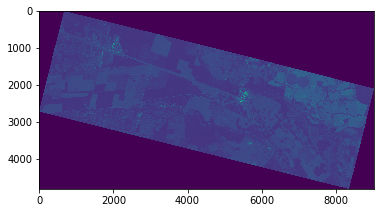

In [8]:
# Displaying the blue band.

fig = plt.imshow(b)
plt.show()

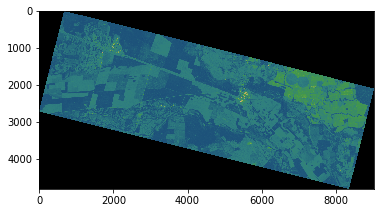

In [9]:
# Displaying the green band.

fig = plt.imshow(g)
fig.set_cmap('gist_earth')
plt.show()

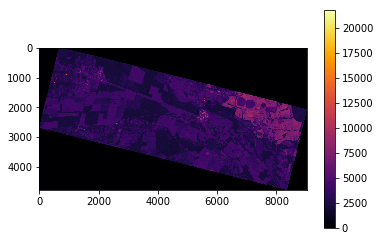

In [11]:
# Displaying the red band.

fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()
plt.show()

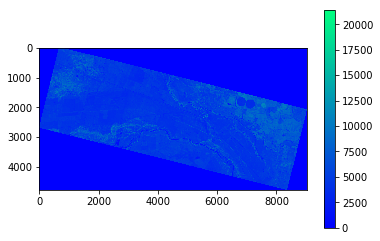

In [10]:
# Displaying the infrared band.

fig = plt.imshow(n)
fig.set_cmap('winter')
plt.colorbar()
plt.show()

In [13]:
np.seterr(divide='ignore', invalid='ignore')

# NDVI 
ndvi = (n.astype(float) - r.astype(float)) / (n + r)

In [14]:
print(np.nanmin(ndvi)) 
print(np.nanmax(ndvi))

-0.6064296151972722
0.7496706192358367


In [15]:
# get the metadata of original GeoTIFF:
meta = raster.meta
print(meta)

# get the dtype of our NDVI array:
ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

# set the source metadata as kwargs we'll use to write the new data:
kwargs = meta

# update the 'dtype' value to match our NDVI array's dtype:
kwargs.update(dtype=ndvi_dtype)

# update the 'count' value since our output will no longer be a 4-band image:
kwargs.update(count=1)

# Finally, use rasterio to write new raster file 'data/ndvi.tif':
with rasterio.open('PROYECTOS/CONTEO_SATELITE/imagenes/ndvi.tif', 'w', **kwargs) as dst:
        dst.write(ndvi, 1)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 9036, 'height': 4794, 'count': 4, 'crs': CRS.from_dict(init='epsg:32718'), 'transform': Affine(3.0, 0.0, 743715.0,
       0.0, -3.0, 5889738.0)}
float64


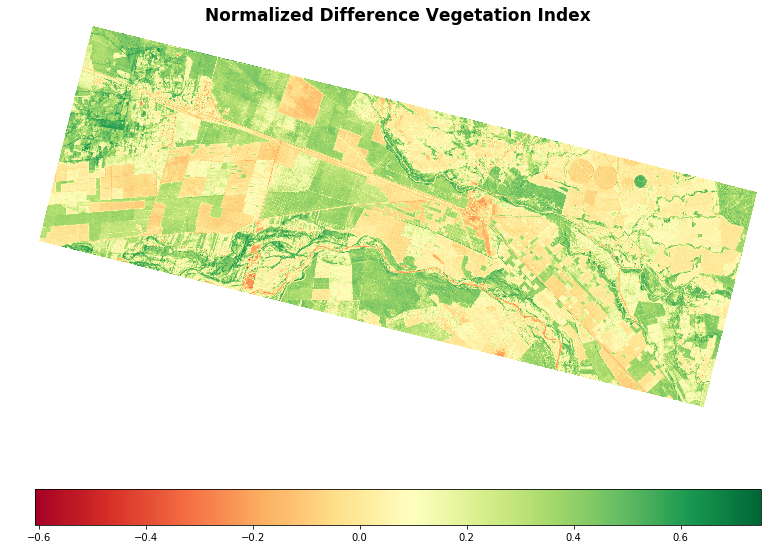

In [18]:
# Set min/max values from NDVI range for image
min=np.nanmin(ndvi)
max=np.nanmax(ndvi)

# Set our custom midpoint for most effective NDVI analysis
mid=0.1

# Setting color scheme ref:https://matplotlib.org/users/colormaps.html as a reference
colormap = plt.cm.RdYlGn 
norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

# Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
cbar_plot = ax.imshow(ndvi, cmap=colormap, vmin=min, vmax=max, norm=norm)


# Turn off the display of axis labels 
ax.axis('off')

# Set a title 
ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

# Configure the colorbar
cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

# Call 'savefig' to save this plot to an image file
fig.savefig("ndvi-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# let's visualize
plt.show()